# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [14]:
#%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [15]:
#%pip install --upgrade plotly

### Import Statements

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [18]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [19]:
df_data.shape

(4324, 9)

In [20]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


Testing for NaN and duplicated values:

In [22]:
df_data.isna().values.any()

True

In [23]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [24]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [25]:
clean_df = df_data.dropna()
clean_df.shape

(964, 9)

## Descriptive Statistics

In [26]:
df_data.describe()
# convert price to numeric value
# drop unamed 0.1 and unamed 0

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [27]:
launch_per_organisations = df_data['Organisation'].value_counts()
launch_per_organisations = pd.DataFrame(launch_per_organisations.values, launch_per_organisations.index, columns=['Total Launches'])
launch_per_organisations

,Total Launches
RVSN USSR,1777
Arianespace,279
CASC,251
General Dynamics,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136
Martin Marietta,114


In [28]:
fig = px.bar(
    launch_per_organisations,
    x='Total Launches',
    y=launch_per_organisations.index,
    color='Total Launches',
    labels={'index': 'Company', 'y': 'Number of Launches'},
    color_continuous_scale=px.colors.sequential.Viridis,
    orientation="h"
)

fig.update_layout(
    title="Number of launches per Company",
    xaxis_title="Company",
    yaxis_title="Total",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [29]:
df_rocket = df_data['Rocket_Status'].value_counts()
df_rocket = pd.DataFrame(df_rocket.values, df_rocket.index, columns=['Count'])
df_rocket

,Count
StatusRetired,3534
StatusActive,790


In [30]:
rocket_fig = px.bar(
    df_rocket,
    x=df_rocket.index,
    y="Count",
    color="Count",
    color_continuous_scale=px.colors.sequential.RdBu,

)

rocket_fig.update_layout(
    title="Active rockets Vs. Decomissioned rockets",
    yaxis_title="Count",
    xaxis_title="Status",
)

rocket_fig.update(layout_coloraxis_showscale=False)

rocket_fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [31]:
df_missions_status = df_data['Mission_Status'].value_counts()
df_missions_status = pd.DataFrame(df_missions_status.values, df_missions_status.index, columns=['Count'])
df_missions_status

,Count
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [32]:
missions_status_fig = px.pie(
    df_missions_status,
    values="Count",
    names=df_missions_status.index,
    hole=0.5,
    color_discrete_sequence=px.colors.sequential.Agsunset
)

missions_status_fig.update_layout(
    title="Distribution of Mission Status"
)

missions_status_fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

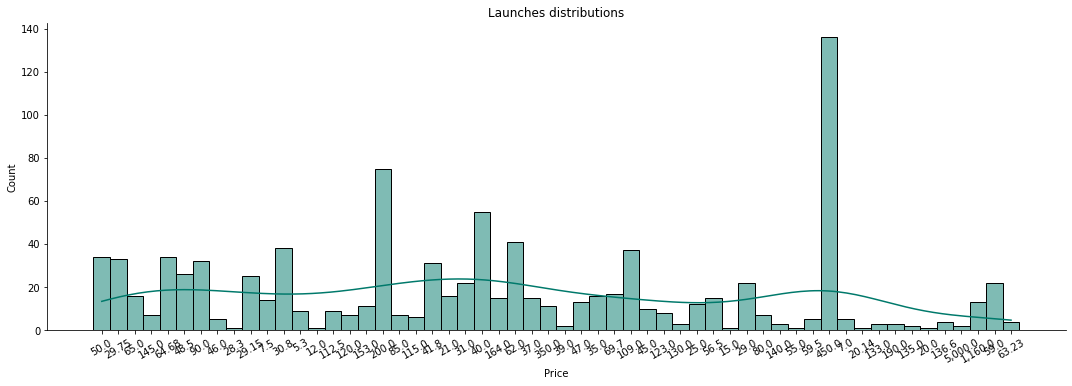

In [33]:
#instead of seaborn, use plotly
launches_distribution_fig = sns.displot(
    df_data['Price'],
    aspect=3,
    kde=True,
    color="#00796b"
)
launches_distribution_fig.set_xticklabels(rotation=30)
plt.title("Launches distributions")

plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [34]:
df_data['Country'] = df_data['Location'].str.split(" ").str[-1]

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 